In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv("../data/train.csv",low_memory=False,parse_dates=[2])
print(train.shape)
train.head()

(1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
train.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [5]:
test=pd.read_csv("../data/test.csv",parse_dates=[3])
print(test.shape)
test.head()

(41088, 8)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [6]:
test.dtypes

Id                        int64
Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Open                    float64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [7]:
store=pd.read_csv("../data/store.csv")
print(store.shape)
store.head()

(1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
ss = pd.read_csv("../data/sample_submission.csv")
print(ss.shape)
ss.head()

(41088, 2)


,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [9]:
# plot missing values percentage
def missing_perc(df):
    # Check the percentage of missing values in every column
    ax = df.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 7))
    plt.title('Percentage of Missing Values Per Column in Tweets data', fontdict={'size':15})

    for p in ax.patches:
        percentage ='{:,.2f}%'.format((p.get_width()/df.shape[0])*100)
        width, height =p.get_width(),p.get_height()
        x=p.get_x()+width+0.02
        y=p.get_y()+height/2
        ax.annotate(percentage,(x,y))

In [10]:
train.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [11]:
test.isna().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [12]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [13]:
train_df=train.merge(store,how='left',on='Store')

In [14]:
test_df=test.merge(store,how='left',on='Store')

In [15]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


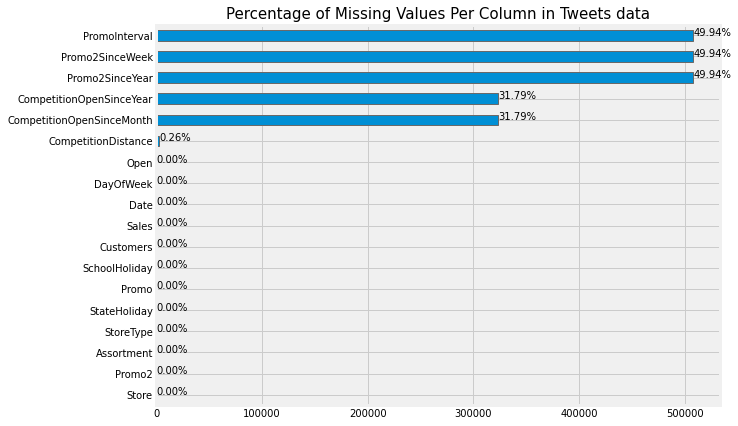

In [16]:
missing_perc(train_df)

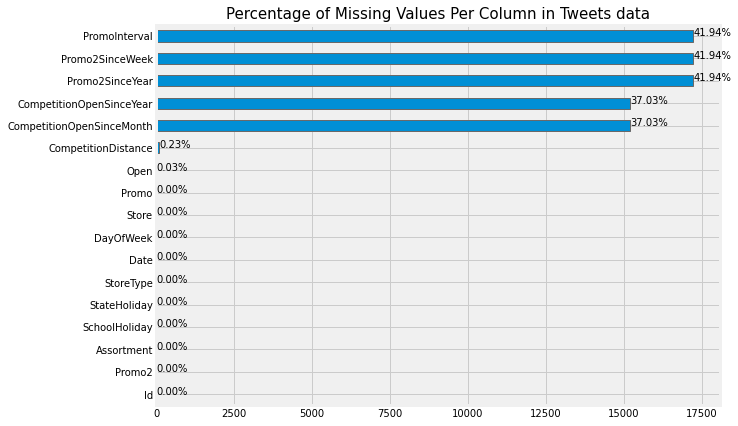

In [17]:
missing_perc(test_df)

In [18]:
# Replace the holidays value the actual name

In [19]:
train_df.replace({'StateHoliday':{'a':'Public Holiday','b':'Easter Holiday','c':'Christmas','0':'None'}},inplace=True)
test_df.replace({'StateHoliday':{'a':'Public Holiday','b':'Easter Holiday','c':'Christmas','0':'None'}},inplace=True)

In [20]:
cat_cols=['StateHoliday','StoreType','Assortment','PromoInterval']

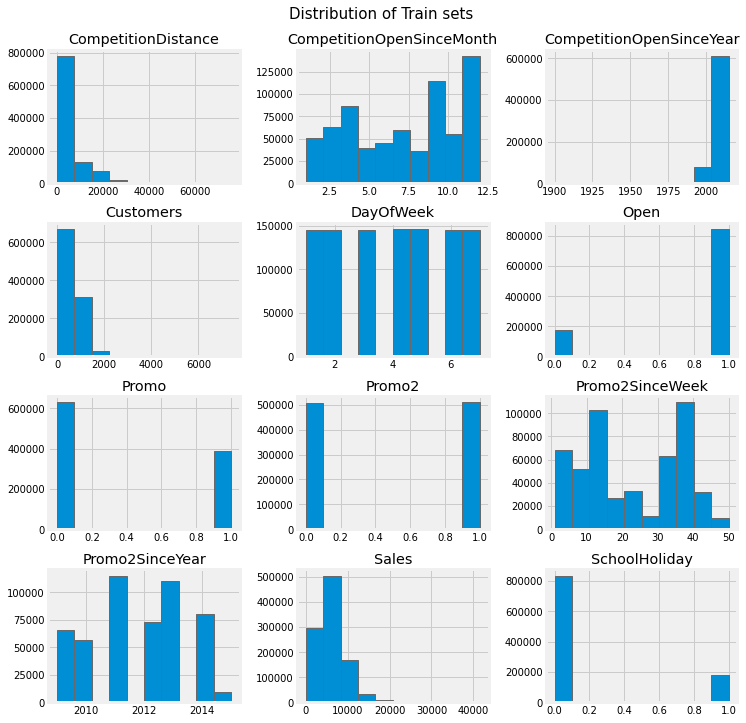

In [21]:
_=train_df[list(train_df.columns.difference(['Store']))].hist(figsize=(11,12))
_=plt.suptitle('Distribution of Train sets',y=0.93,size=15)

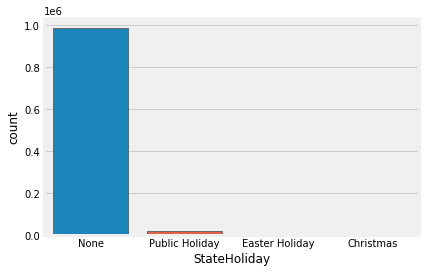

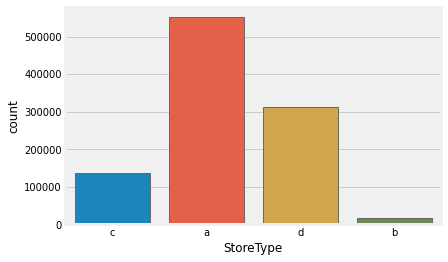

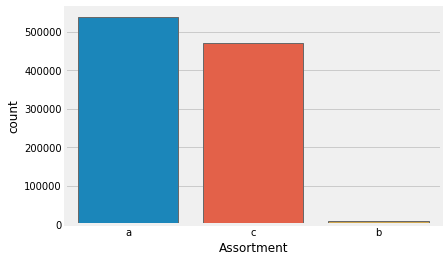

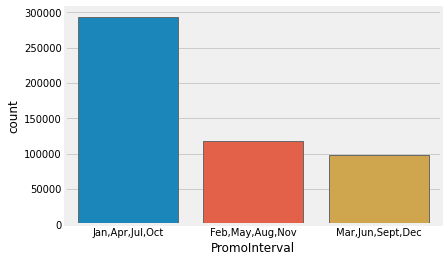

<Figure size 432x288 with 0 Axes>

In [22]:
for col in cat_cols:
    sns.countplot(x=col,data=train_df)
    plt.figure()

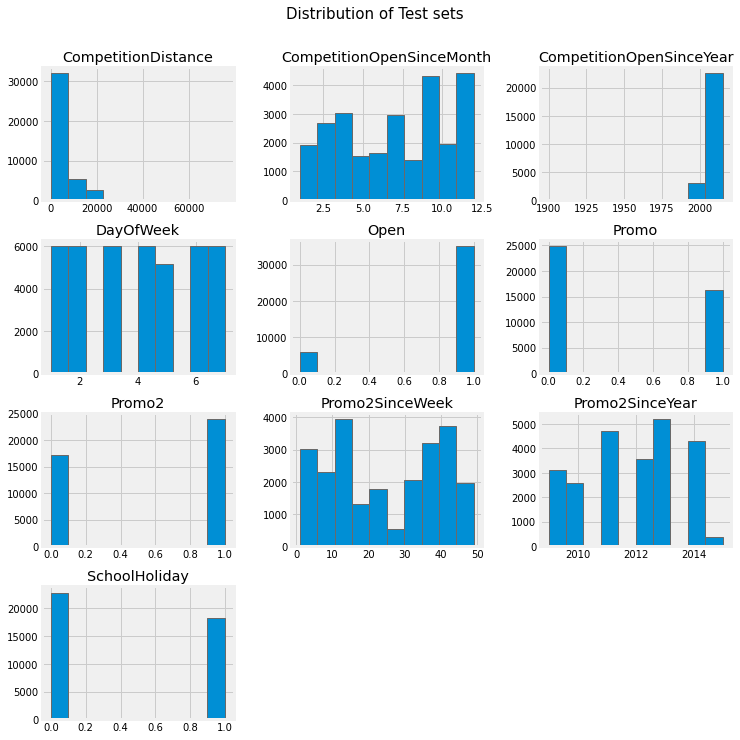

In [23]:
_=test_df[list(test_df.columns.difference(['Id','Store']))].hist(figsize=(11,12))
_=plt.suptitle('Distribution of Test sets',y=0.95,size=15)

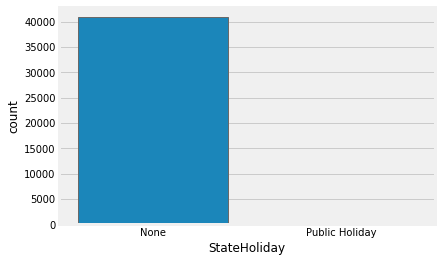

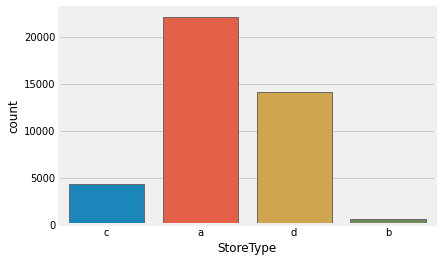

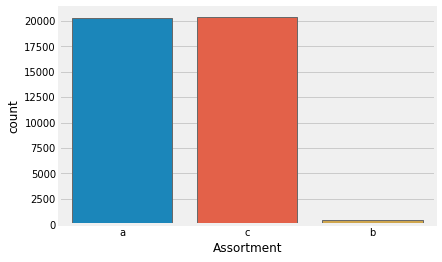

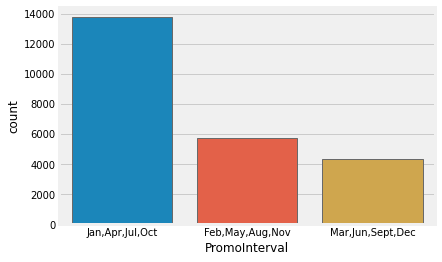

<Figure size 432x288 with 0 Axes>

In [24]:
for col in cat_cols:
    sns.countplot(x=col,data=test_df)
    plt.figure()

#### Check and Remove outliers 

In [25]:
#Find the outliers

def outlier_bound(df,cols_use):
    bounds={}
    for col in cols_use:
        q1=df[col].quantile(0.05)  #0.05
        q3=df[col].quantile(0.95)   #0.95
        lower_b=q1-(1.5*(q3-q1))
        upper_b=q3+(1.5*(q3-q1))
        bounds[col]=[lower_b,upper_b]
    return bounds

In [26]:
#Replace the outliers with median value This helps with the computational analysis.

def outlier_remove(df,cols_use):
    bounds=outlier_bound(df,cols_use)
    for col in cols_use:
        mean_use=df[col][(df[col] > bounds[col][0]) & (df[col] < bounds[col][1])].median()
        df[col].where((df[col]>bounds[col][0])&(df[col]<bounds[col][1]),mean_use,inplace=True)
    return df

In [27]:
train_df=outlier_remove(train_df,['Sales','Customers'])

In [28]:
def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str=None,rot=0,figsize:tuple=(8,5)) -> None:
    plt.figure(figsize=figsize)
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title)
    plt.xticks(fontsize=14,rotation=rot)
    plt.yticks(fontsize=14)
    plt.show()

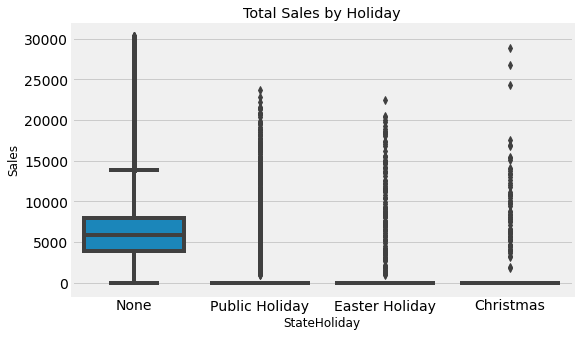

In [29]:
# a = public holiday, b = Easter holiday, c = Christmas, 0 = None
# _=sns.boxplot(x='StateHoliday',y='Sales',data=train_df)
plot_box_multi(train_df,x_col='StateHoliday',y_col='Sales',title='Total Sales by Holiday')

**How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?**

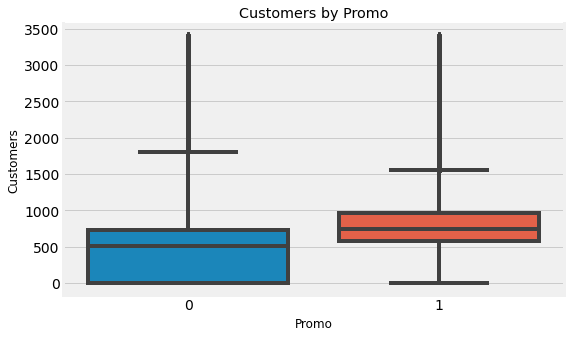

In [30]:
plot_box_multi(train_df,x_col='Promo',y_col='Customers',title='Customers by Promo')

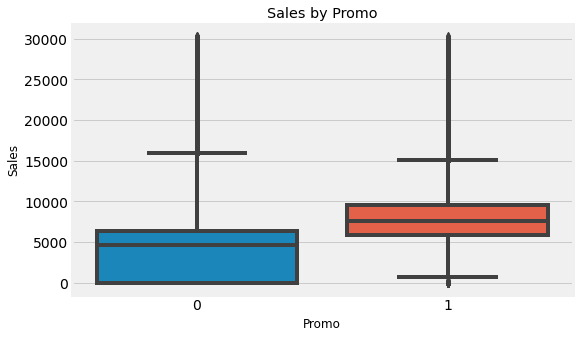

In [31]:
plot_box_multi(train_df,x_col='Promo',y_col='Sales',title='Sales by Promo')

In [46]:
train_df.groupby(by=['Store','Promo']).mean()

DayOfWeek         Sales    Customers      Open  SchoolHoliday  \
Store Promo                                                                  
1     0        4.61512   3198.994845   399.682131  0.740550       0.195876   
      1        3.00000   5152.886111   577.522222  0.972222       0.219444   
2     0        4.61512   2855.058419   366.876289  0.738832       0.149485   
      1        3.00000   6172.816667   678.702778  0.983333       0.222222   
3     0        4.61512   3967.596220   477.445017  0.737113       0.161512   
...                ...           ...          ...       ...            ...   
1113  1        3.00000   7320.086111   754.250000  0.980556       0.211111   
1114  0        4.61512  14251.895189  1676.396907  0.740550       0.159794   
      1        3.00000  21382.925000  2232.411111  0.980556       0.211111   
1115  0        4.61512   4082.221649   297.800687  0.740550       0.195876   
      1        3.00000   7073.266667   457.122222  0.972222       0.219444   

             CompetitionDistance  CompetitionOpenSinceMonth  \
Store Promo                                                   
1     0                   1270.0                        9.0   
      1                   1270.0                        9.0   
2     0                    570.0                       11.0   
      1                    570.0                       11.0   
3     0                  14130.0                       12.0   
...                          ...                        ...   
1113  1                   9260.0                        NaN   
1114  0                    870.0                        NaN   
      1                    870.0                        NaN   
1115  0                   5350.0                        NaN   
      1                   5350.0                        NaN   

             CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  \
Store Promo                                                      
1     0                        2008.0     0.0              NaN   
      1                        2008.0     0.0              NaN   
2     0                        2007.0     1.0             13.0   
      1                        2007.0     1.0             13.0   
3     0                        2006.0     1.0             14.0   
...                               ...     ...              ...   
1113  1                           NaN     0.0              NaN   
1114  0                           NaN     0.0              NaN   
      1                           NaN     0.0              NaN   
1115  0                           NaN     1.0             22.0   
      1                           NaN     1.0             22.0   

             Promo2SinceYear  
Store Promo                   
1     0                  NaN  
      1                  NaN  
2     0               2010.0  
      1               2010.0  
3     0               2011.0  
...                      ...  
1113  1                  NaN  
1114  0                  NaN  
      1                  NaN  
1115  0               2012.0  
      1               2012.0  

[2230 rows x 11 columns]

In [44]:
train_df.query('Promo==1') #.plot(x='Date',y='Sales')
# train_df.query('Promo==0').plot(x='Date',y='Sales')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,None,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,None,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,None,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,None,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,None,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010515,1111,1,2013-01-07,9444,735,1,1,None,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1010516,1112,1,2013-01-07,25165,1661,1,1,None,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1010517,1113,1,2013-01-07,8984,907,1,1,None,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1010518,1114,1,2013-01-07,21237,2962,1,1,None,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


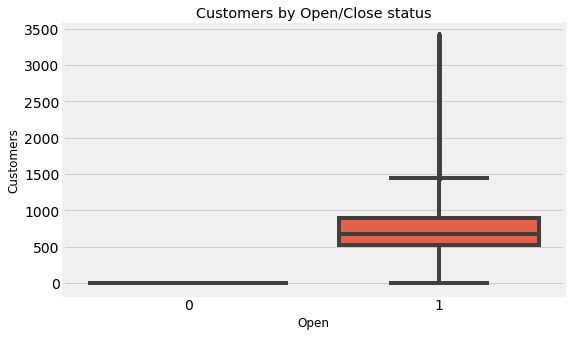

In [32]:
plot_box_multi(train_df,x_col='Open',y_col='Customers',title='Customers by Open/Close status')

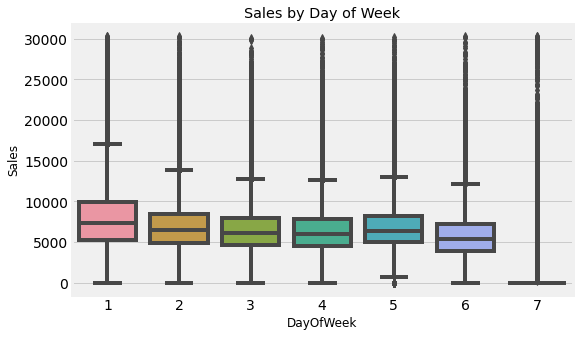

In [33]:
plot_box_multi(train_df,x_col='DayOfWeek',y_col='Sales',title='Sales by Day of Week')

In [34]:
# train.set_index('Date',inplace=True,drop=True)

In [35]:
# test.set_index('Date',inplace=True,drop=True)

In [36]:
train_grouped=train_df.groupby(by='Date').aggregate({'Sales':'sum','Customers':'sum','StateHoliday':'unique'})

In [37]:
train_grouped['StateHoliday']=train_grouped['StateHoliday'].apply(lambda x: x[0])

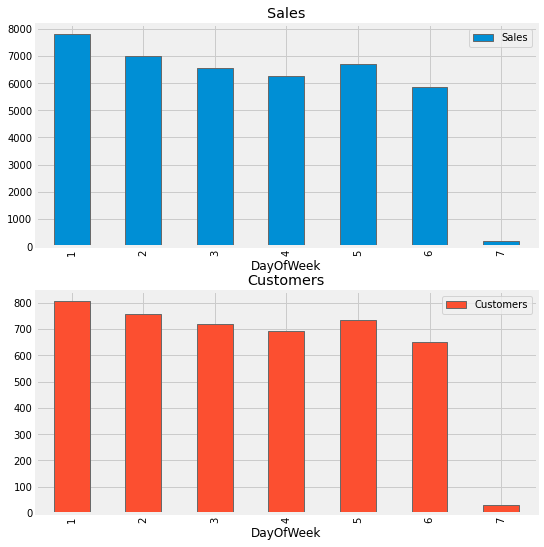

In [38]:
_=train_df.groupby(by='DayOfWeek').agg({'Sales':'mean','Customers':'mean'}).plot(kind='bar',
                                                                                 subplots=True,figsize=(8,9),sharex=False)

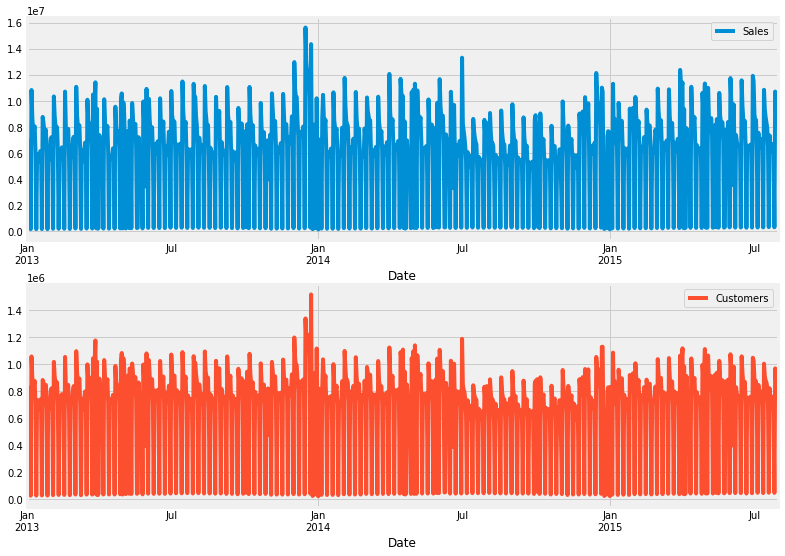

In [39]:
_=train_grouped[['Sales','Customers']].plot(subplots=True,figsize=(12,9),sharex=False)

In [40]:
public_holiday=train_grouped.query("StateHoliday=='Public Holiday'").index
xmas=train_grouped.query("StateHoliday=='Christmas'").index
easter=train_grouped.query("StateHoliday=='Easter Holiday'").index

In [41]:
#plot lines
def highlight_datetimes(indices, ax):
    i = 0
    while i < len(indices)-1:
        ax.axvspan(df.index[indices[i]], df.index[indices[i] + 1], facecolor='green', edgecolor='none', alpha=.5)
        i += 1

In [42]:
# train_grouped.drop('StateHoliday',axis=1,inplace=True)

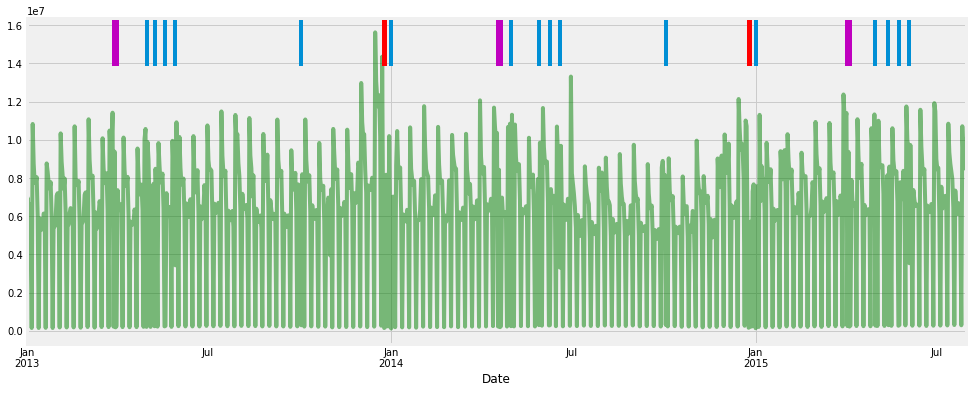

In [43]:
# fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True,figsize=(15,6))
# for v in train_grouped.columns.difference(['StateHoliday']).tolist():
train_grouped['Sales'].plot(color='g',figsize=(15,6),alpha=0.5)

#highlight areas
# highlight_datetimes(public_holiday, axes)
for i in public_holiday:
    plt.axvline(i,label='Public Holiday',ymin=0.85)

for i in easter:
    plt.axvline(i,color='m',label='Easter',ymin=0.85)

for i in xmas:
    plt.axvline(i,color='r',label='Christmas',ymin=0.85)

<AxesSubplot:xlabel='Date'>

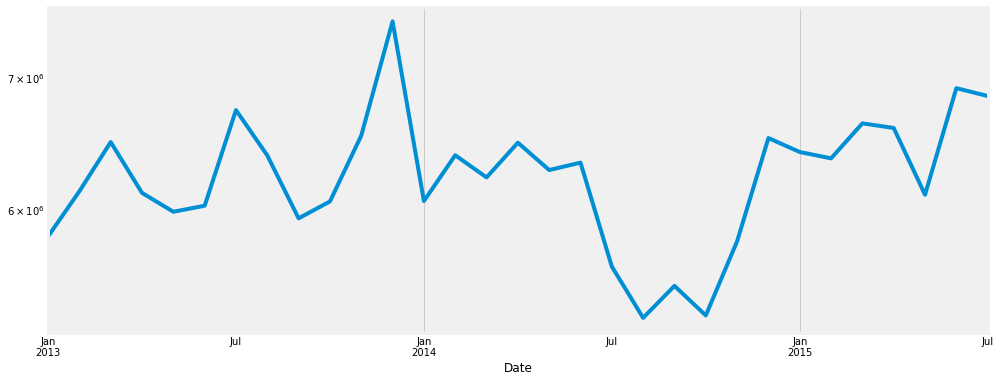

In [44]:
monthly=train_grouped['Sales'].resample('M').mean()
monthly.plot(figsize=(15,6),logy=True)

Text(0, 0.5, 'Correlation Coefficient')

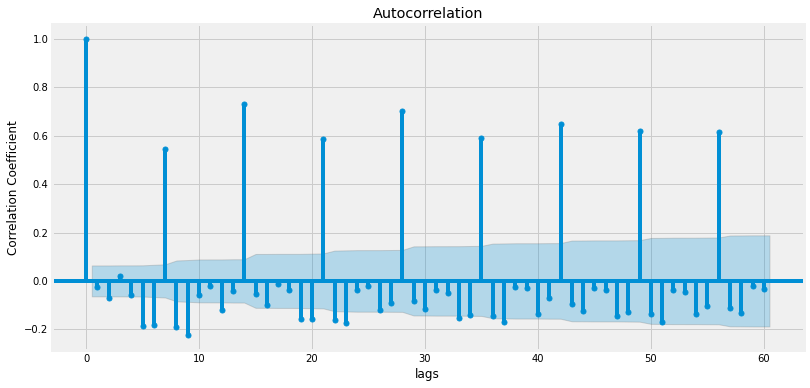

In [45]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(12, 6))
# posbound=1.96/np.sqrt(len(train_grouped['Sales']))
# negbound=-1.96/np.sqrt(len(train_grouped['Sales']))
plot_acf(train_grouped['Sales'],lags=60,ax=ax);
# plt.hlines(posbound,1,240,'r',label='95% Confidence bounds')
# plt.hlines(negbound,1,240,'r')
plt.xlabel("lags")
plt.ylabel("Correlation Coefficient")
# plt.legend()

In [46]:
mpl.rcParams['agg.path.chunksize'] = 10000

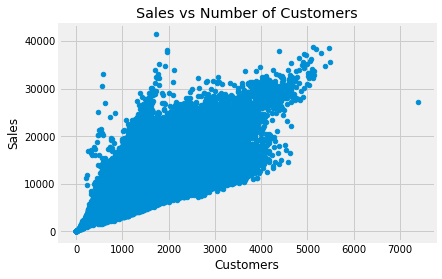

In [47]:
_=train_df.plot(kind='scatter',x='Customers',y='Sales',title='Sales vs Number of Customers')

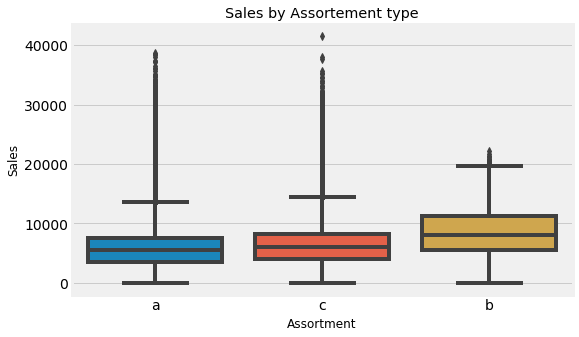

In [48]:
plot_box_multi(train_df,x_col='Assortment',y_col='Sales',title='Sales by Assortement type')

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Sales'>

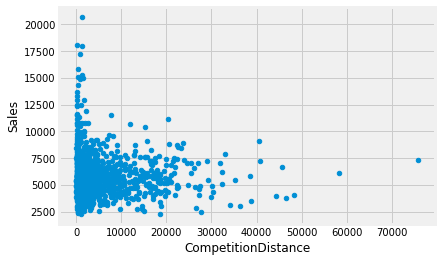

In [49]:
train_df.groupby(by='Store').mean().plot(kind='scatter',x='CompetitionDistance',y='Sales')

<AxesSubplot:xlabel='Date'>

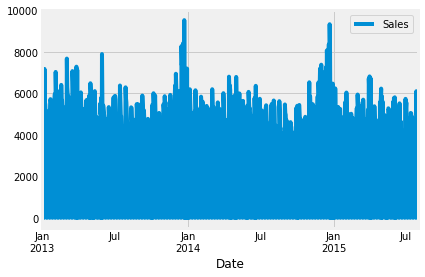

In [50]:
train_df[train_df['Store']==1].plot(x='Date',y='Sales')

In [51]:
# tt=train_df[train_df['CompetitionOpenSinceYear']>2013].groupby('Store').mean()

In [52]:
# train_df.query('CompetitionOpenSinceYear==2013').groupby(by='Date')['Sales'].mean().plot()

In [53]:
# train_df['DayOfWeek'].value_counts()
# train_df.query("Open==1 &(DayOfWeek==6 or DayOfWeek==7)")